# Imports

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import model_from_json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# ACF and PACF

In [21]:
data_folder = 'C:\\Users\\gfrei\\OneDrive\\Documentos\\LSTM\\' #change this to the folder where you have the data

In [22]:
train_data = []
folder = data_folder + 'TRAIN'
NN = 5000

for p in [0,1,2,3,4,5]:
    for q in [0,1,2,3,4,5]:
        for i in range(1,NN+1,1):
            # Define the path to your text file
            file_path = f'{folder}\\ACF_{p}_{q}\\acf_{i}.txt'

            # Read data from the text file
            with open(file_path, 'r') as file:
                data = file.readlines()
                # Convert data to floats
                acf_data = [float(val.strip()) for val in data]

                # eliminate the first value
                acf_data = acf_data[1:]

                # Define the path to your text file
            file_path = f'{folder}\\PACF_{p}_{q}\\pacf_{i}.txt'

            # Read data from the text file
            with open(file_path, 'r') as file:
                data = file.readlines()
                # Convert data to floats
                pacf_data = [float(val.strip()) for val in data]

            train_data.append([acf_data,pacf_data,p,q])
    print(f'{p} - Done')


0 - Done
1 - Done
2 - Done
3 - Done
4 - Done
5 - Done


In [23]:
train_data[0]

[[0.04899107,
  0.01409651,
  0.0006177109,
  0.01507704,
  0.05637621,
  0.03517173,
  0.02911688,
  -0.01886636,
  -0.009777088,
  -0.01687771,
  0.01388817,
  -0.04766906,
  0.009534193,
  0.03840036,
  0.06973997,
  -0.05372226,
  -0.007694497,
  -0.01637911,
  0.01189769,
  0.03299616],
 [0.04899107,
  0.01172453,
  -0.0006408185,
  0.01495075,
  0.05507765,
  0.02961303,
  0.02484317,
  -0.02240269,
  -0.01004255,
  -0.01946945,
  0.0116155,
  -0.05229708,
  0.01475383,
  0.04095334,
  0.0701437,
  -0.06083417,
  0.0008966102,
  -0.01588938,
  0.01027102,
  0.02064943],
 0,
 0]

In [24]:
test_data = []
folder = data_folder + 'TEST'
NN = 500

for p in [0,1,2,3,4,5]:
    for q in [0,1,2,3,4,5]:
        for i in range(1,NN+1,1):
            # Define the path to your text file
            file_path = f'{folder}\\ACF_{p}_{q}\\acf_{i}.txt'

            # Read data from the text file
            with open(file_path, 'r') as file:
                data = file.readlines()
                # Convert data to floats
                acf_data = [float(val.strip()) for val in data]

                # eliminate the first value
                acf_data = acf_data[1:]

                # Define the path to your text file
            file_path = f'{folder}\\PACF_{p}_{q}\\pacf_{i}.txt'

            # Read data from the text file
            with open(file_path, 'r') as file:
                data = file.readlines()
                # Convert data to floats
                pacf_data = [float(val.strip()) for val in data]

            test_data.append([acf_data,pacf_data,p,q])
            
    print(f'{p} - Done')


0 - Done
1 - Done
2 - Done
3 - Done
4 - Done
5 - Done


In [25]:
test_data[0]

[[-0.03869769,
  -0.03225154,
  -0.03088447,
  -0.03705073,
  0.01616055,
  -0.07647053,
  0.03939676,
  -0.0007328179,
  0.03403427,
  0.02533493,
  0.01403308,
  -0.04157001,
  0.006566278,
  -0.007846352,
  0.08048002,
  -0.01477112,
  -0.01454112,
  -0.07762481,
  0.01757993,
  0.001453106],
 [-0.03869769,
  -0.03379967,
  -0.03357125,
  -0.04090777,
  0.01079419,
  -0.07953635,
  0.03168707,
  -0.004299285,
  0.03266032,
  0.02417553,
  0.02351333,
  -0.04358274,
  0.01486934,
  -0.009899516,
  0.08548728,
  -0.01151201,
  -0.006222543,
  -0.08683828,
  0.02101831,
  -0.01285684],
 0,
 0]

In [26]:
final_train_data = train_data
final_test_data = test_data

# Preprocess the data
X_train = np.array([[value[0],value[1]] for value in final_train_data])  # ACF and PACF lags
y_train = np.array([[value[2],value[3]]for value in final_train_data])  # p and q values
X_test = np.array([[test_value[0],test_value[1]] for test_value in final_test_data])
y_test = np.array([[test_value[2],test_value[3]] for test_value in final_test_data])

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (180000, 2, 20)
Shape of y_train: (180000, 2)
Shape of X_test: (18000, 2, 20)
Shape of y_test: (18000, 2)


In [27]:
from tensorflow.keras.layers import Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler




# Define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(Dense(2))  # Output layer with 2 neurons for p and q
#model.compile(optimizer=RMSprop(), loss='mae')
model.compile(optimizer='adam', loss='mae')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

C:\Users\gfrei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - loss: 1.1184 - val_loss: 0.6864
Epoch 2/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 0.7481 - val_loss: 0.5960
Epoch 3/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 0.6761 - val_loss: 0.5438
Epoch 4/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 0.6403 - val_loss: 0.5157
Epoch 5/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - loss: 0.6155 - val_loss: 0.4978
Epoch 6/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - loss: 0.6012 - val_loss: 0.4904
Epoch 7/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - loss: 0.5918 - val_loss: 0.4704
Epoch 8/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - loss: 0.5799 - val_loss: 0.4627
Epoch 9/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - loss: 0.5723 - val_loss: 0.4542
Epoch 10/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 0.5673 - val_loss: 0.4487
Epoch 11/100
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - loss: 0.5609 - val

In [28]:
#from keras.models import save_model

## Define the file paths for saving the model architecture and weights
architecture_path = 'upgraded_acf_pacf.json'
weights_path = 'upgraded_acf_pacf.weights.h5'  # Adjusted filename

## Save the model architecture as JSON
model_architecture = model.to_json()
with open(architecture_path, 'w') as json_file:
    json_file.write(model_architecture)

## Save the model weights
model.save_weights(weights_path)

print("Model architecture and weights saved successfully.")


Model architecture and weights saved successfully.


In [29]:
# save the model to .h5 and .keras also
model.save('upgraded_acf_pacf.h5')
model.save('upgraded_acf_pacf.keras')

In [30]:
architecture_path = 'upgraded_acf_pacf.json'
weights_path = 'upgraded_acf_pacf.weights.h5'

# Load the model architecture from JSON
with open(architecture_path, 'r') as json_file:
    loaded_model_json = json_file.read()

# Reconstruct the model from the architecture
model = model_from_json(loaded_model_json)

# Load the model weights into the reconstructed model
model.load_weights(weights_path)

print("Model architecture and weights loaded successfully.")


Model architecture and weights loaded successfully.


In [31]:
X_test = np.array([[test_value[0],test_value[1]] for test_value in final_test_data])
y_test = np.array([[test_value[2],test_value[3]] for test_value in final_test_data])

train_predict = model.predict(X_train)
predictions = model.predict(X_test)

train_predict = abs(np.round(train_predict))
test_predict = abs(np.round(predictions))

train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

train_accuracy = np.mean(np.all(train_predict == y_train, axis=1))
test_accuracy = np.mean(np.all(test_predict == y_test, axis=1))

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

5625/5625 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Train Accuracy: 0.6132833333333333
Test Accuracy: 0.592


In [32]:
df = pd.DataFrame(columns = [0,1,2,3,4,5], index = [0,1,2,3,4,5])
#pd.set_option('future.no_silent_downcasting', True)
df = df.fillna(0).infer_objects(copy=False)
for i in range(len(y_test)):
    p_test = y_test[i][0]
    q_test = y_test[i][1]
    p_pred = test_predict[i][0]
    q_pred = test_predict[i][1]
    if(p_test == p_pred and q_test == q_pred):
        df.loc[p_test,q_test] += 1
df = round(df/500*100,2)
df

,0,1,2,3,4,5
0,97.6,74.2,73.8,91.4,78.8,69.0
1,70.4,34.6,38.4,68.4,56.6,55.0
2,64.8,34.6,33.0,49.6,43.0,35.2
3,96.8,73.2,69.2,81.4,61.8,56.8
4,83.2,63.6,50.0,62.0,39.4,42.0
5,77.4,53.0,40.6,44.2,37.2,31.0


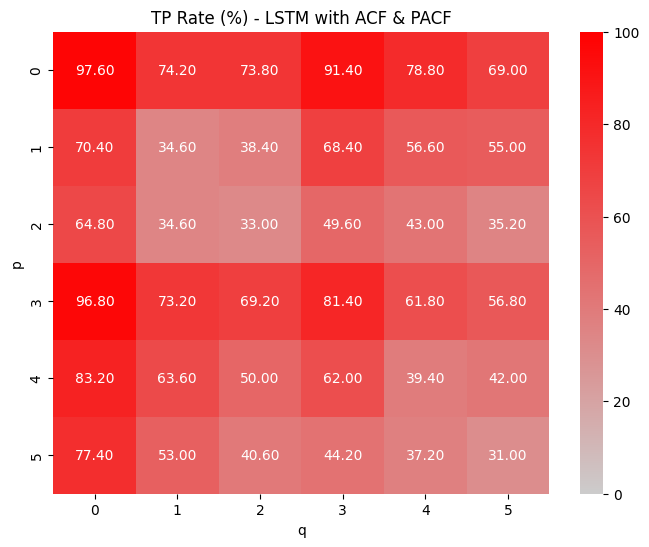

In [33]:
# Custom colormap from light gray to red
colors = [(0.8, 0.8, 0.8), (1, 0, 0)]  # Light Gray to Red
cmap_name = 'light_gray_to_red'
n_bins = 10**5  # Discretization of the colormap
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a heatmap with custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap=custom_cmap, fmt='.2f', vmin=0, vmax=100)
plt.title('TP Rate (%) - LSTM with ACF & PACF')
plt.xlabel('q')
plt.ylabel('p')
plt.savefig('upgrade_acf_pacf.pdf')
plt.show()

In [34]:
np.unique(test_predict, axis=0)

p_values = np.unique(test_predict[:,0])
q_values = np.unique(test_predict[:,1])

In [35]:
df = pd.DataFrame()
for p in p_values:
    for q in q_values:
        # add row '(p,q)' with value 0
        df.loc[f'({p},{q})', f'({p},{q})'] = 0
df

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(1,0)","(1,1)","(1,2)","(1,3)",...,"(4,2)","(4,3)","(4,4)","(4,5)","(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)"
"(0,0)",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,1)",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,2)",NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,3)",NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,4)",NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,5)",NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1,0)",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1,1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1,2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1,3)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
idx_in = 0
idx_out = 500
results = []

while(idx_out <= len(y_test)):
    test_array = y_test[idx_in:idx_out]
    pred_array = test_predict[idx_in:idx_out]
    dict = {}
    p = test_array[0][0]
    q = test_array[0][1]

    for i in range(len(test_array)):
        p_pred = pred_array[i][0]
        q_pred = pred_array[i][1]
        # add to dict
        if (p_pred,q_pred) in dict:
            dict[(p_pred,q_pred)] += 1
        else:
            dict[(p_pred,q_pred)] = 1

    results.append([[p,q],dict])
    idx_in += 500
    idx_out += 500

results[-1]




[[5, 5],
 {(5, 5): 155,
  (5, 3): 48,
  (5, 4): 84,
  (4, 5): 95,
  (4, 4): 40,
  (5, 2): 8,
  (3, 3): 3,
  (3, 4): 17,
  (5, 1): 6,
  (4, 3): 15,
  (3, 5): 17,
  (2, 5): 5,
  (1, 3): 1,
  (4, 1): 1,
  (5, 0): 2,
  (2, 1): 1,
  (4, 2): 1,
  (2, 0): 1}]

In [37]:
df = pd.DataFrame()

for result in results:
    real_p = result[0][0]
    real_q = result[0][1]
    for key in result[1].keys():
        selected_p = key[0]
        selected_q = key[1]
        count = result[1][key]
        df.loc[f"({real_p},{real_q})",f"({selected_p},{selected_q})"] = round(count/500 * 100,2)

# order columns
df = df.reindex(sorted(df.columns), axis=1)
df.to_excel("results_upgraded.xlsx")
df

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(1,0)","(1,1)","(1,2)","(1,3)",...,"(4,2)","(4,3)","(4,4)","(4,5)","(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)"
"(0,0)",97.6,0.4,NaN,NaN,NaN,NaN,1.6,0.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,1)",17.2,74.2,2.0,NaN,NaN,NaN,1.0,3.6,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,2)",0.8,5.8,73.8,1.2,NaN,NaN,2.4,2.6,11.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,3)",NaN,NaN,3.0,91.4,1.2,NaN,NaN,NaN,NaN,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,4)",NaN,NaN,0.8,13.6,78.8,0.8,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,5)",NaN,NaN,NaN,2.0,18.4,69.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN
"(1,0)",20.0,5.0,NaN,NaN,NaN,NaN,70.4,3.8,0.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1,1)",11.2,17.0,2.8,NaN,NaN,NaN,19.2,34.6,6.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1,2)",0.8,8.2,19.6,2.0,NaN,NaN,3.8,11.4,38.4,2.6,...,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1,3)",NaN,1.0,3.4,15.4,NaN,NaN,NaN,0.2,6.4,68.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
